In [31]:
# Plot the maps for the whole array and the subarrays

In [32]:
## Importing modules
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np
from os.path import join

In [33]:
## Inputs
root = "/Volumes/OmanData/geophones_no_prefilt/data"

eastmin_whole = -115
eastmax_whole = 65
northmin_whole = -100
northmax_whole = 105

eastmin_a = -20
eastmax_a = 65
northmin_a = -100
northmax_a = -25

In [34]:
## Read the station coordinates
inpath = join(root, "stations.csv")
stadf = pd.read_csv(inpath, delimiter=" ", index_col=0)


In [35]:
## Read the map boundaries
inpath = join(root, "map_boundaries.csv")
mapdf = pd.read_csv(inpath, delimiter=" ", index_col=0)

eastmax_whole = mapdf.loc[ "whole", "max_east" ]
eastmin_whole = mapdf.loc[ "whole", "min_east" ]
northmax_whole = mapdf.loc[ "whole", "max_north"]
northmin_whole = mapdf.loc[ "whole", "min_north" ]

eastmax_a = mapdf.loc[ "A", "max_east" ]
eastmin_a = mapdf.loc[ "A", "min_east" ]
northmax_a = mapdf.loc[ "A", "max_north"]
northmin_a = mapdf.loc[ "A", "min_north" ]

eastmax_b = mapdf.loc[ "B", "max_east" ]
eastmin_b = mapdf.loc[ "B", "min_east" ]
northmax_b = mapdf.loc["B", "max_north"]
northmin_b = mapdf.loc["B", "min_north"]

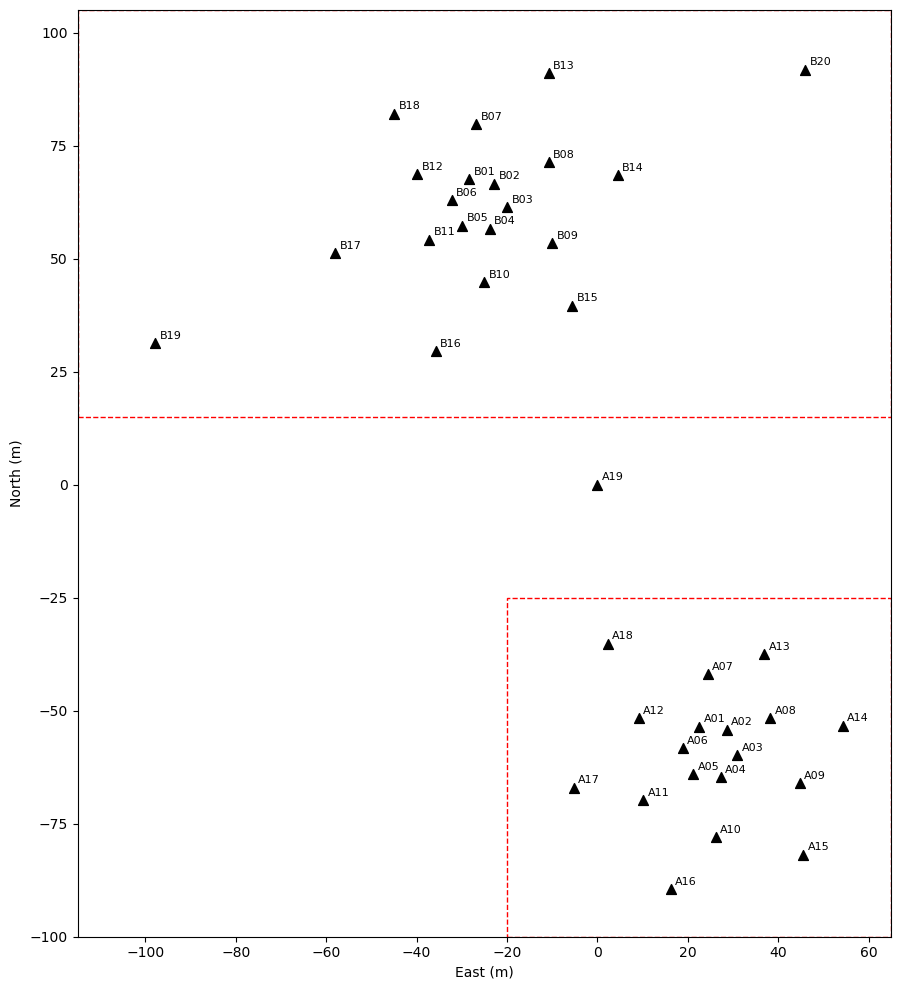

In [36]:
## Plot the whole array
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.scatter(stadf["east"], stadf["north"], marker="^", s=50, c="k")
for i, row in stadf.iterrows():
    ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=8, color="k")

ax.set_xlabel("East (m)")
ax.set_ylabel("North (m)")
ax.set_xlim(eastmin_whole, eastmax_whole)
ax.set_ylim(northmin_whole, northmax_whole)
ax.set_aspect("equal")


# Create the rectangle patch
rect1 = Rectangle((eastmin_a, northmin_a), eastmax_a - eastmin_a, northmax_a - northmin_a, 
                    linewidth=1, edgecolor='red', facecolor='none', linestyle='dashed')

rect2 = Rectangle((eastmin_b, northmin_b), eastmax_b - eastmin_b, northmax_b - northmin_b,
                    linewidth=1, edgecolor='red', facecolor='none', linestyle='dashed')

# Add the rectangle patch to the plot
ax.add_patch(rect1)
ax.add_patch(rect2)

## Save the figure
fig.tight_layout()
filename = f"station_map_w_subarray_boxes.png"

outpath = join(root, filename)
fig.savefig(outpath, dpi=300, transparent=True)


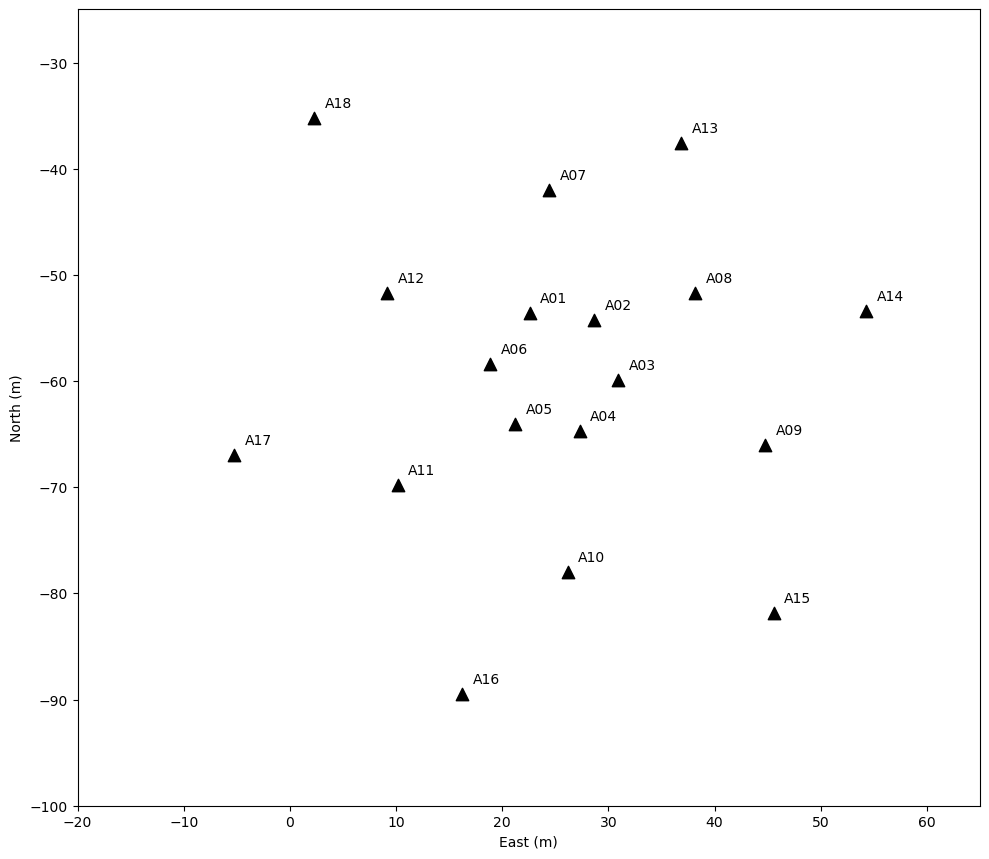

In [37]:
## Plot Subarray A
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

stadf_a = stadf[stadf["subarray"] == "A"]

ax.scatter(stadf_a["east"], stadf_a["north"], marker="^", s=80, c="k")
for i, row in stadf_a.iterrows():
    ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=10, color="k")

ax.set_xlabel("East (m)")
ax.set_ylabel("North (m)")
ax.set_xlim(eastmin_a, eastmax_a)
ax.set_ylim(northmin_a, northmax_a)
ax.set_aspect("equal")

## Save the figure
fig.tight_layout()
filename = f"station_map_A.png"

outpath = join(root, filename)
fig.savefig(outpath, dpi=300, transparent=True)

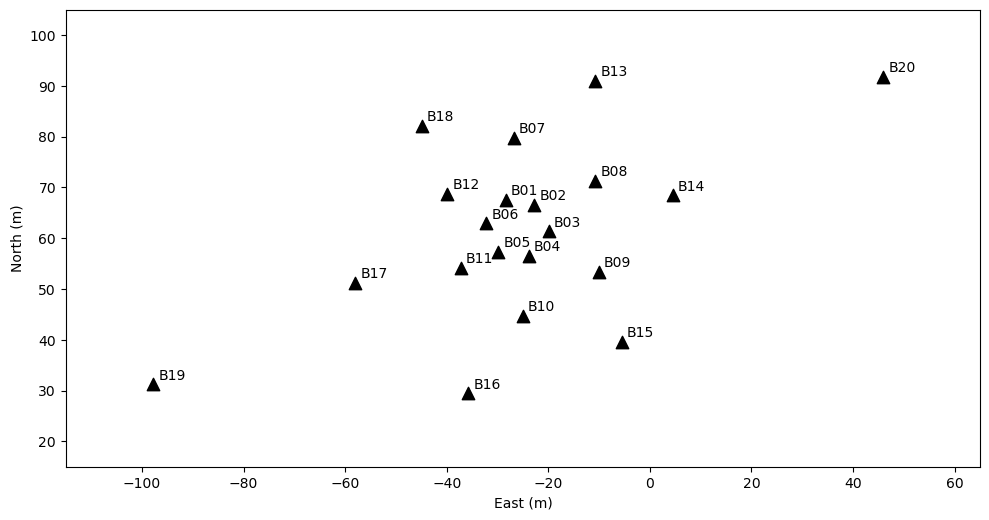

In [38]:
## Plot Subarray B
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

stadf_b = stadf[stadf["subarray"] == "B"]

ax.scatter(stadf_b["east"], stadf_b["north"], marker="^", s=80, c="k")
for i, row in stadf_b.iterrows():
    ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=10, color="k")
    
ax.set_xlabel("East (m)")
ax.set_ylabel("North (m)")
ax.set_xlim(eastmin_b, eastmax_b)
ax.set_ylim(northmin_b, northmax_b)
ax.set_aspect("equal")

## Save the figure
fig.tight_layout()
filename = f"station_map_B.png"

outpath = join(root, filename)
fig.savefig(outpath, dpi=300, transparent=True)
